# P10 - Analysez les saisonnalités des ventes d'une activité e-commerce pour gérer au mieux les variations d'activité

# 1/ Explorez le jeu de données

## 1.1 Chargez les données et bibliothèques 

In [4]:
## Importation des bibliothèques nécessaires pour travailler avec des data, calculs et visualisations.

import pandas as pd
import numpy as np
from tabulate import tabulate 
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#importation du fichier et chargement
dataset = pd.read_excel("Jeu_de_données.xlsx")

## 1.2 Déterminez les ordres de grandeurs et indicateurs statistiques basiques

In [7]:
## Affichage des informations détaillées 

print("\nInformations sur la structure du dataset :\n")
dataset.info()

print("\n\nStatistiques descriptives :\n")
dataset.describe(include='all')


Informations sur la structure du dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32865 entries, 0 to 32864
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     32865 non-null  datetime64[ns]
 1   Produit  32865 non-null  object        
 2   CA       32865 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 770.4+ KB


Statistiques descriptives :



,Date,Produit,CA
count,32865,32865,32865.000000
unique,NaN,15,NaN
top,NaN,pomme,NaN
freq,NaN,2191,NaN
mean,2019-12-31 23:59:59.999999744,NaN,97.117858
min,2017-01-01 00:00:00,NaN,-3.789978
25%,2018-07-02 00:00:00,NaN,69.905156
50%,2020-01-01 00:00:00,NaN,91.853413
75%,2021-07-02 00:00:00,NaN,122.164007
max,2022-12-31 00:00:00,NaN,228.911753


### Affichez les premières et dernières lignes du jeu de données

In [9]:
# Afficher les 5 premières lignes
print("Premières lignes du dataset :")
print(dataset.head())

# Afficher les 5 dernières lignes
print("\nDernières lignes du dataset :")
print(dataset.tail())

Premières lignes du dataset :
        Date Produit          CA
0 2017-01-01   pomme  128.966949
1 2017-01-01  ananas  126.385420
2 2017-01-01    kiwi  124.877243
3 2017-01-01  tomate  121.629409
4 2017-01-01  banane  121.263112

Dernières lignes du dataset :
            Date       Produit         CA
32860 2022-12-31      pasteque  83.423286
32861 2022-12-31       abricot  82.913329
32862 2022-12-31         melon  49.124565
32863 2022-12-31        mangue  44.583940
32864 2022-12-31  pamplemousse  43.179316


### Affichez le nombre de lignes du jeu de données

In [11]:
nombre_lignes = len(dataset)
print(f"Nombre de lignes : {nombre_lignes}") 

Nombre de lignes : 32865


### Affichez le nombre de produits unique (famille de produits vendus)

In [13]:
nombre_produits = dataset['Produit'].nunique()
print(f"Nombre de produits unique : {nombre_produits}")

Nombre de produits unique : 15


### Affichez la période de l'historique du dataset ( + Transformation du format en datetime )

In [15]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

periode_debut = dataset['Date'].min()
periode_fin = dataset['Date'].max()

print(f"Période de l'historique : {periode_debut.date()} à {periode_fin.date()}")

Période de l'historique : 2017-01-01 à 2022-12-31


## 1.3 Calculez le volume total des ventes sur la période précédemment analysée 

In [17]:
volume_global = dataset['CA'].sum()

print(f"Le volume global de vente de {periode_debut.date()} à {periode_fin.date()} est de : {round(volume_global,2)} EUROS")

Le volume global de vente de 2017-01-01 à 2022-12-31 est de : 3191778.39 EUROS


### Analysez le volume de ces ventes par an 

In [19]:


dataset['Annee'] = dataset['Date'].dt.year
volume_par_an = dataset.groupby('Annee')['CA'].sum().round(2)

volume_par_an = volume_par_an.astype(str) + " €"
volume_par_an_df = volume_par_an.reset_index()
volume_par_an_df.columns = ['Année', 'Volume en EUROS']
print(tabulate(volume_par_an_df, headers='keys', tablefmt='grid'))

+----+---------+-------------------+
|    |   Année | Volume en EUROS   |
+====+=========+===================+
|  0 |    2017 | 521934.95 €       |
+----+---------+-------------------+
|  1 |    2018 | 526120.65 €       |
+----+---------+-------------------+
|  2 |    2019 | 529662.76 €       |
+----+---------+-------------------+
|  3 |    2020 | 532656.95 €       |
+----+---------+-------------------+
|  4 |    2021 | 539035.51 €       |
+----+---------+-------------------+
|  5 |    2022 | 542367.58 €       |
+----+---------+-------------------+


### Visualisez ce volume de manière statistique 

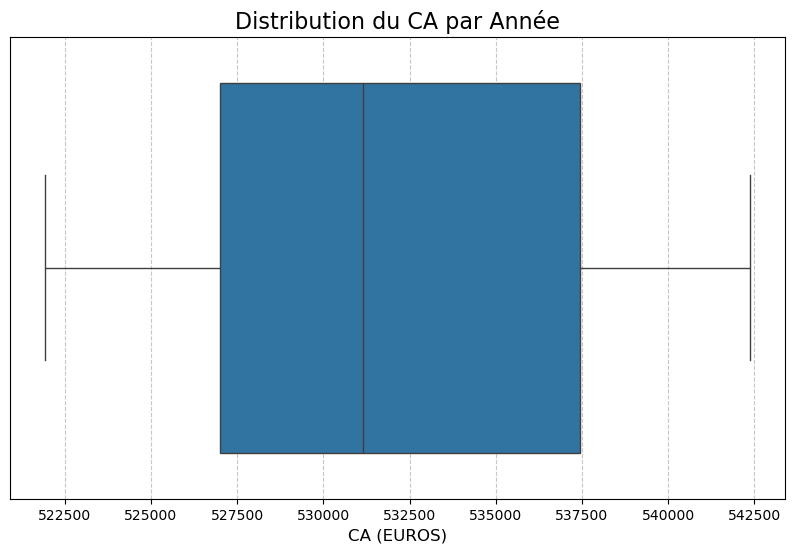

In [21]:
## Visualisation du CA par an via Boxlot 

volume_par_an_numeric = dataset.groupby('Annee')['CA'].sum()

# Créer le boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=volume_par_an_numeric.values.reshape(-1, 1), orient="h")
plt.title("Distribution du CA par Année", fontsize=16)
plt.xlabel("CA (EUROS)", fontsize=12)
plt.yticks(ticks=[], labels=[])  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Les valeurs des ventes sont concentrées dans une plage relativement stable chaque année

## 1.4 Déterminez la structure du jeu de données

### Traitez les valeurs manquantes

In [24]:
# Identifier les valeurs manquantes
print("Valeurs manquantes par colonne :")
missing_values = dataset.isnull().sum()
print(missing_values)

# Calculer le pourcentage de valeurs manquantes s'il y en a
print("\nPourcentage de valeurs manquantes :")
missing_percentage = (missing_values / len(dataset)) * 100
print(missing_percentage)

## Il n'y a pas de valeurs manquantes =>
print("\n Il n'y a pas de valeurs manquantes.\n")

Valeurs manquantes par colonne :
Date       0
Produit    0
CA         0
Annee      0
dtype: int64

Pourcentage de valeurs manquantes :
Date       0.0
Produit    0.0
CA         0.0
Annee      0.0
dtype: float64

 Il n'y a pas de valeurs manquantes.



### Traitez les valeurs incohérentes

In [26]:
## On y retrouve 2 valeures négatives, pas la data nécessaire pour analyser la raison mais bon à prendre en compte

# Filtrer les lignes où la colonne 'CA' contient des valeurs négatives
valeurs_negatives = dataset[dataset['CA'] < 0]

# Afficher les valeurs négatives
print(valeurs_negatives)


           Date       Produit        CA  Annee
1709 2017-04-24  pamplemousse -3.789978   2017
7019 2018-04-13        orange -0.382452   2018


### Calculez des indicateurs statistiques

In [28]:
# Calcul des indicateurs statistiques
moyenne = dataset['CA'].mean()
ecart_type = dataset['CA'].std()
mediane = dataset['CA'].median()
q1 = dataset['CA'].quantile(0.25)
q3 = dataset['CA'].quantile(0.75)

# Afficher les résultats
print("\nIndicateurs statistiques globaux :\n")
print(f"Moyenne : {moyenne}")
print(f"Écart-type : {ecart_type}")
print(f"Médiane : {mediane}")
print(f"Q1 : {q1}")
print(f"Q3 : {q3}")


Indicateurs statistiques globaux :

Moyenne : 97.11785775132692
Écart-type : 37.53435603497206
Médiane : 91.8534128498012
Q1 : 69.9051559201004
Q3 : 122.164006876019


### Visualisez les indicateurs statistiques

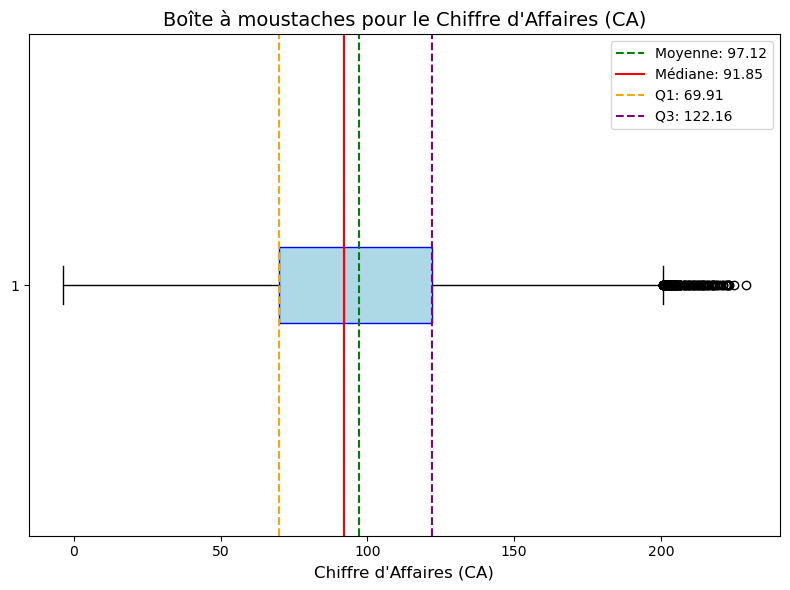

In [30]:
# Création d'une boîte à moustaches
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['CA'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue", color="blue"), medianprops=dict(color="red"))
plt.title("Boîte à moustaches pour le Chiffre d'Affaires (CA)", fontsize=14)
plt.xlabel("Chiffre d'Affaires (CA)", fontsize=12)

# Ajout des indicateurs statistiques au graphique
plt.axvline(moyenne, color='green', linestyle='--', label=f"Moyenne: {moyenne:.2f}")
plt.axvline(mediane, color='red', linestyle='-', label=f"Médiane: {mediane:.2f}")
plt.axvline(q1, color='orange', linestyle='--', label=f"Q1: {q1:.2f}")
plt.axvline(q3, color='purple', linestyle='--', label=f"Q3: {q3:.2f}")

# Affichage des légendes
plt.legend()
plt.tight_layout()
plt.show()


### Déterminez ces valeurs par Produit

In [32]:
# Grouper les données par produit et calculer les indicateurs statistiques
stats = dataset.groupby('Produit')['CA'].agg(
    moyenne='mean',
    ecart_type='std',
    mediane='median',
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75)
).reset_index()

# Afficher sans l'index avec tabulate
print("\nIndicateurs statistiques par produit :\n")
print(tabulate(stats, headers='keys', tablefmt='grid', showindex=False))


Indicateurs statistiques par produit :

+--------------+-----------+--------------+-----------+----------+----------+
| Produit      |   moyenne |   ecart_type |   mediane |       Q1 |       Q3 |
+==============+===========+==============+===========+==========+==========+
| abricot      |  122.397  |     24.4759  |  120.533  | 103.657  | 139.255  |
+--------------+-----------+--------------+-----------+----------+----------+
| ananas       |   91.2442 |     22.2496  |   90.035  |  75.297  | 105.792  |
+--------------+-----------+--------------+-----------+----------+----------+
| banane       |  129.508  |     19.5095  |  129.573  | 116.594  | 142.957  |
+--------------+-----------+--------------+-----------+----------+----------+
| cerise       |   71.4932 |     20.4444  |   70.5935 |  57.628  |  84.5693 |
+--------------+-----------+--------------+-----------+----------+----------+
| clementine   |   76.8322 |     22.5323  |   76.3506 |  61.1274 |  91.7101 |
+--------------+-------

# 2/ Analysez les saisonnalités du top 5 des produits et les corrélations

### Identifier le Top 5 des produits les plus commandés

In [35]:
# Expliquer oralement comment obtenir ce résultat 

top5 = dataset.groupby('Produit')['CA'].sum().nlargest(5).round(2)   #-> extrait les 5 plus grands CA et arrondi à 2 décimal  
print("\nTop 5 des produits par volume total commandé :\n")
print(top5)



Top 5 des produits par volume total commandé :

Produit
tomate     344699.89
pomme      332199.55
banane     283751.42
abricot    268172.01
kiwi       257409.96
Name: CA, dtype: float64


## 2.1 Visualisez les données

### Visualisation graphique des données

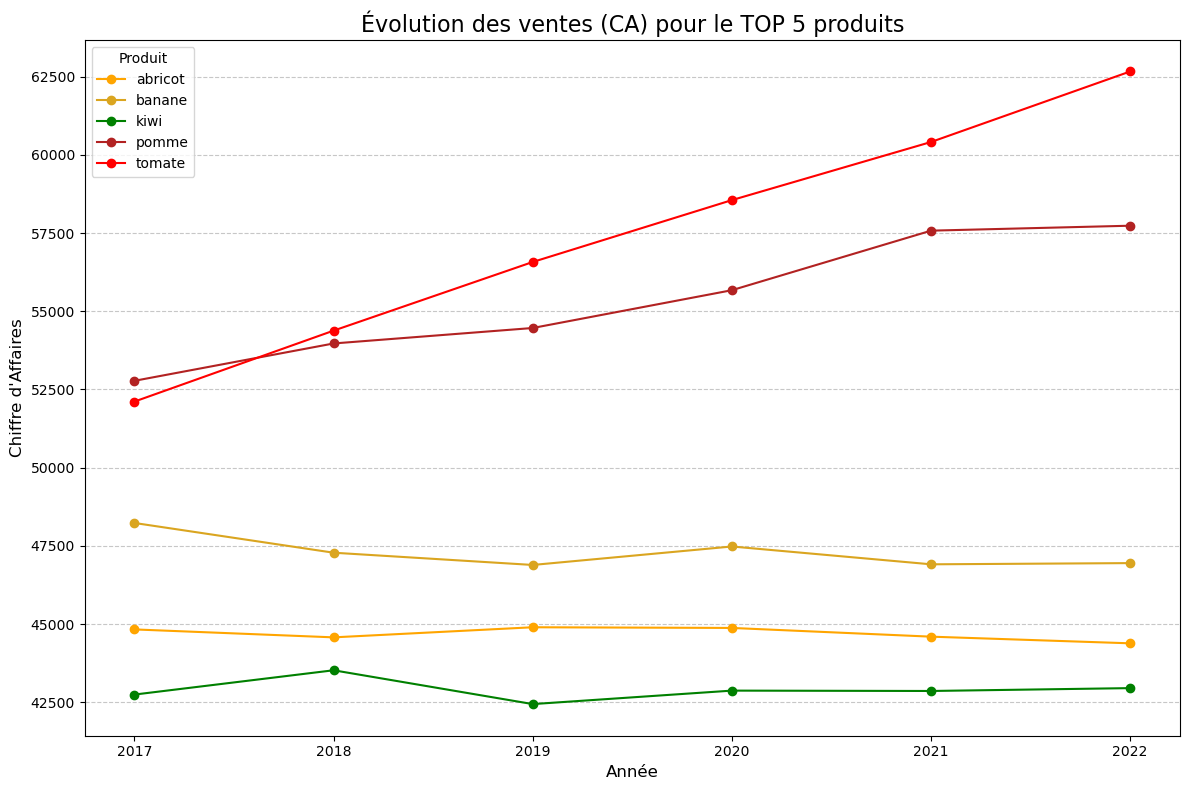

In [38]:

# Prétraitement des données
dataset['Année'] = pd.to_datetime(dataset['Date']).dt.year

# Grouper le chiffre d'affaires par produit et année
ca_par_produit_annee = dataset.groupby(['Produit', 'Année'])['CA'].sum().reset_index()

# Isoler le TOP 5 des produits en CA total
top_5_produits = ca_par_produit_annee.groupby('Produit')['CA'].sum().nlargest(5).index
ca_top_5 = ca_par_produit_annee[ca_par_produit_annee['Produit'].isin(top_5_produits)]

# Préparer les données pour le graphique
grouped = ca_top_5.pivot(index='Année', columns='Produit', values='CA')

# Associer des couleurs spécifiques aux produits
couleurs = {
    "abricot": "orange",
    "tomate": "red",
    "banane": "goldenrod",  # Jaune foncé
    "kiwi": "green",
    "pomme": "#B22222"  # Rouge avec des reflets verts
}

# Tracer les courbes avec les couleurs définies
plt.figure(figsize=(12, 8))
for produit in grouped.columns:
    color = couleurs.get(produit, 'blue')  # Utiliser la couleur définie ou 'blue' par défaut
    plt.plot(grouped.index, grouped[produit], marker='o', label=produit, color=color)

# Ajouter les titres et légendes
plt.title("Évolution des ventes (CA) pour le TOP 5 produits", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Chiffre d'Affaires", fontsize=12)
plt.legend(title="Produit", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## Détail de l'évolution par mois et années

C:\Users\Amine\AppData\Local\Temp\ipykernel_7224\1382282967.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_top_5_mois_annee['Période'] = ca_top_5_mois_annee['Année'].astype(str) + '-' + ca_top_5_mois_annee['Mois'].astype(str).str.zfill(2)


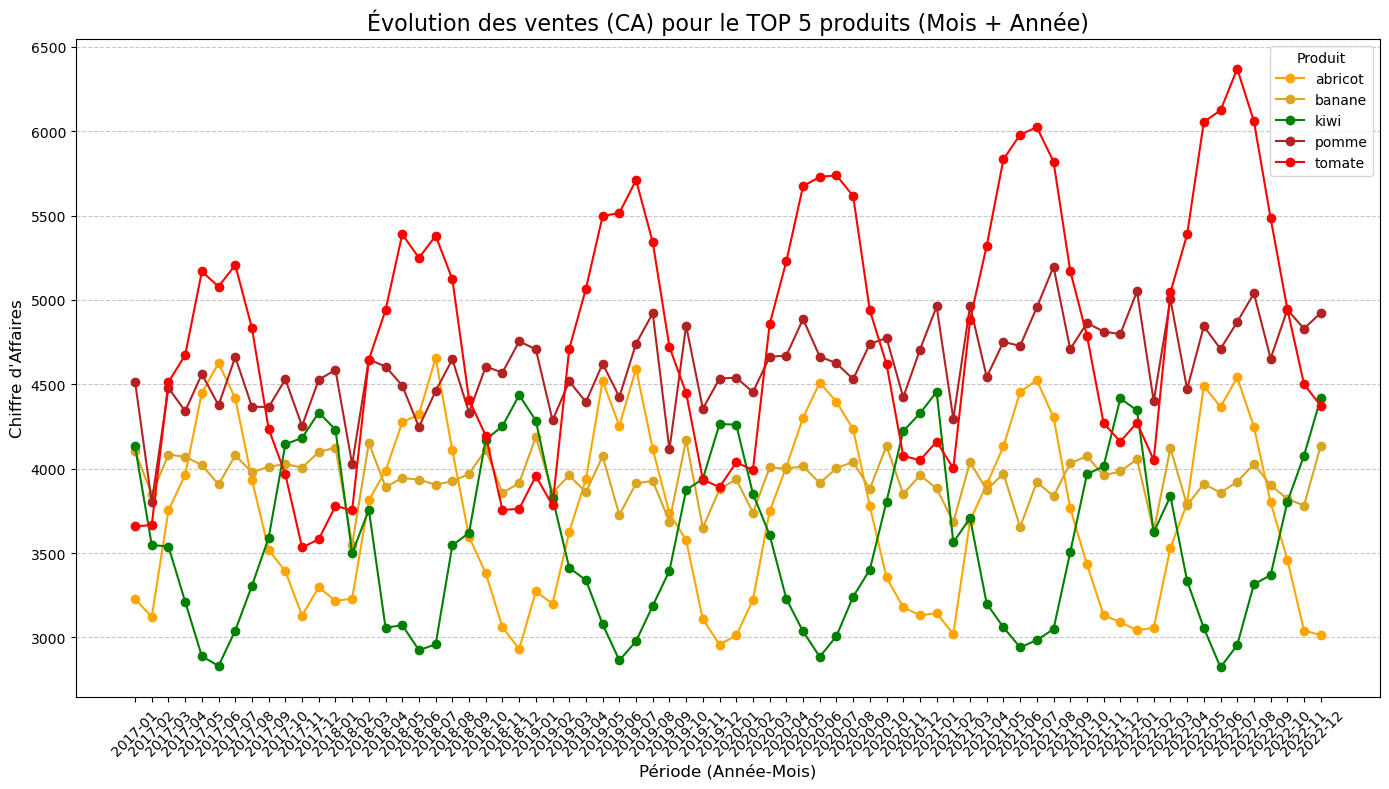

In [40]:
# Ajouter des colonnes 'Année' et 'Mois'
dataset['Année'] = pd.to_datetime(dataset['Date']).dt.year
dataset['Mois'] = pd.to_datetime(dataset['Date']).dt.month

# Grouper le chiffre d'affaires par produit, année et mois
ca_par_produit_mois_annee = dataset.groupby(['Produit', 'Année', 'Mois'])['CA'].sum().reset_index()

# Isoler le TOP 5 des produits en CA total
top_5_produits = ca_par_produit_mois_annee.groupby('Produit')['CA'].sum().nlargest(5).index

# Filtrer les données pour le TOP 5
ca_top_5_mois_annee = ca_par_produit_mois_annee[ca_par_produit_mois_annee['Produit'].isin(top_5_produits)]

# Visualiser l'évolution des ventes pour le TOP 5 (Mois + Année)
ca_top_5_mois_annee['Période'] = ca_top_5_mois_annee['Année'].astype(str) + '-' + ca_top_5_mois_annee['Mois'].astype(str).str.zfill(2)
grouped_periode = ca_top_5_mois_annee.pivot(index='Période', columns='Produit', values='CA')


# Couleurs spécifiques pour chaque produit
couleurs = {
    "abricot": "orange",
    "tomate": "red",
    "banane": "goldenrod",  # Jaune foncé
    "kiwi": "green",
    "pomme": "#B22222"  # Couleur mixte (rouge avec des reflets verts, type pomme gala)
}

# Tracer le graphique avec les couleurs personnalisées
plt.figure(figsize=(14, 8))
for produit in grouped_periode.columns:
    color = couleurs.get(produit, None)  # Utiliser la couleur personnalisée si définie
    plt.plot(grouped_periode.index, grouped_periode[produit], marker='o', label=produit, color=color)

plt.title("Évolution des ventes (CA) pour le TOP 5 produits (Mois + Année)", fontsize=16)
plt.xlabel("Période (Année-Mois)", fontsize=12)
plt.ylabel("Chiffre d'Affaires", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Produit", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Graphique plus visuel - Trimestriel avec épaisseur augmenter pour afficher la correlation des ventes

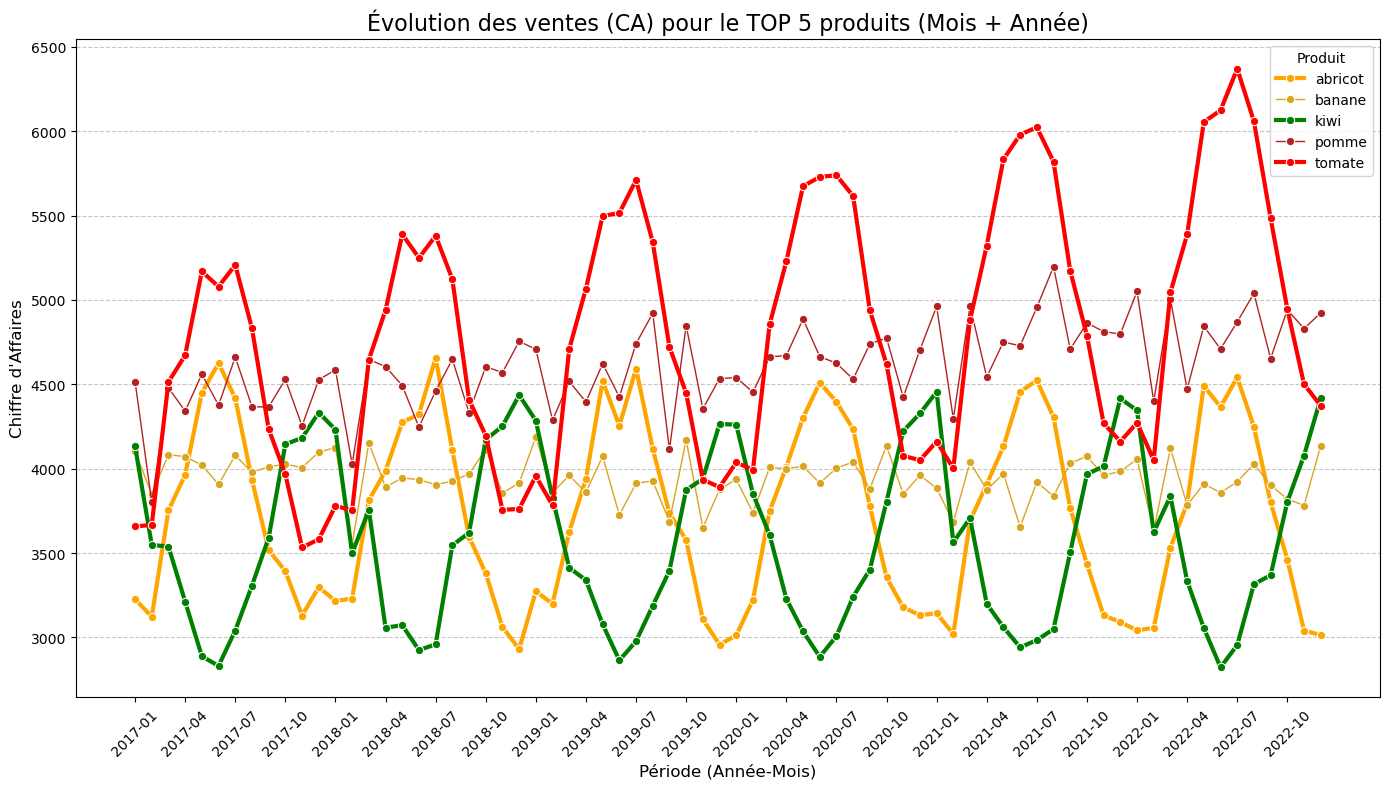

In [42]:
# Créer le graphique avec les couleurs personnalisées
plt.figure(figsize=(14, 8))

# Produits spécifiques à mettre en gras
produits_en_gras = ['tomate', 'abricot' , 'kiwi']

# Couleurs spécifiques pour chaque produit
couleurs = {
    "abricot": "orange",
    "tomate": "red",
    "banane": "goldenrod",  # Jaune foncé
    "kiwi": "green",
    "pomme": "#B22222"  # Couleur mixte (rouge avec des reflets verts, type pomme gala)
}

# Tracer les courbes avec distinction et couleurs
for produit in ca_top_5_mois_annee['Produit'].unique():
    data = ca_top_5_mois_annee[ca_top_5_mois_annee['Produit'] == produit]
    if produit in produits_en_gras:
        sns.lineplot(
            data=data,
            x='Période',
            y='CA',
            label=produit,
            linewidth=3,  # Épaisseur augmentée
            marker='o',
            color=couleurs.get(produit, None)
        )
    else:
        sns.lineplot(
            data=data,
            x='Période',
            y='CA',
            label=produit,
            linewidth=1,  # Épaisseur standard
            marker='o',
            color=couleurs.get(produit, None)
        )

# Ajustements des axes et titres
plt.title("Évolution des ventes (CA) pour le TOP 5 produits (Mois + Année)", fontsize=16)
plt.xlabel("Période (Année-Mois)", fontsize=12)
plt.ylabel("Chiffre d'Affaires", fontsize=12)

# Espacement et échantillonnage des étiquettes de l'axe X
xticks = ca_top_5_mois_annee['Période'].unique()
plt.xticks(ticks=xticks[::3], rotation=45, fontsize=10)

# Ajouter une grille et une légende
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Produit", fontsize=10)

# Afficher le graphique
plt.tight_layout()
plt.show()


### Détail précis par produit

C:\Users\Amine\AppData\Local\Temp\ipykernel_7224\4178948444.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_top_5_mois_annee['Période'] = ca_top_5_mois_annee['Année'].astype(str) + '-' + ca_top_5_mois_annee['Mois'].astype(str).str.zfill(2)


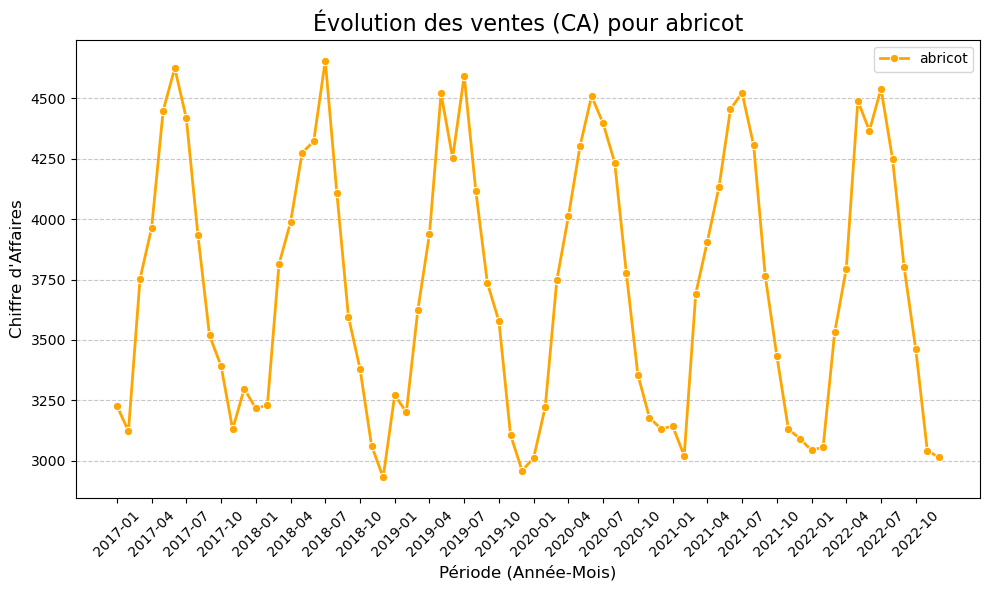

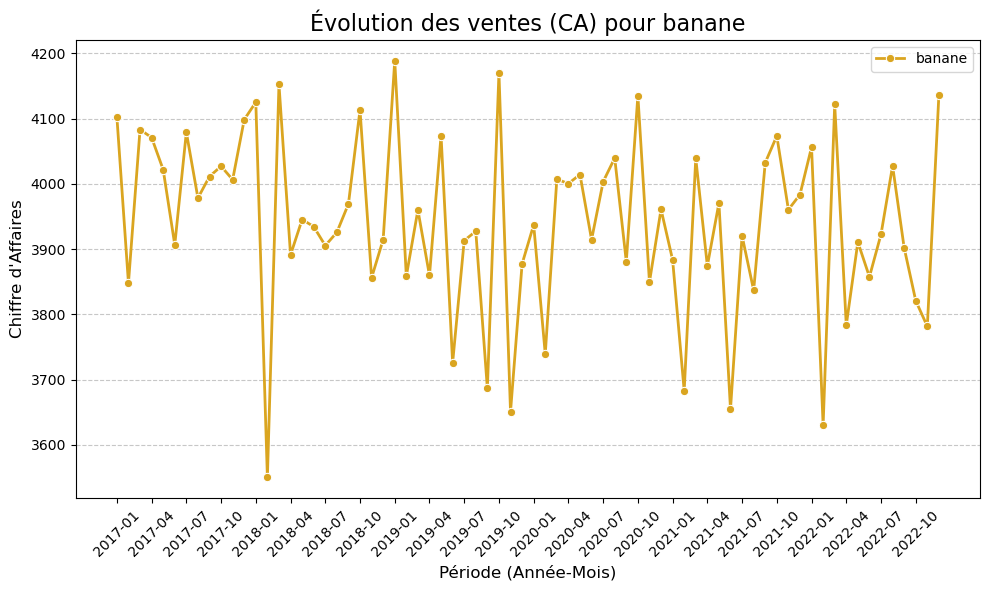

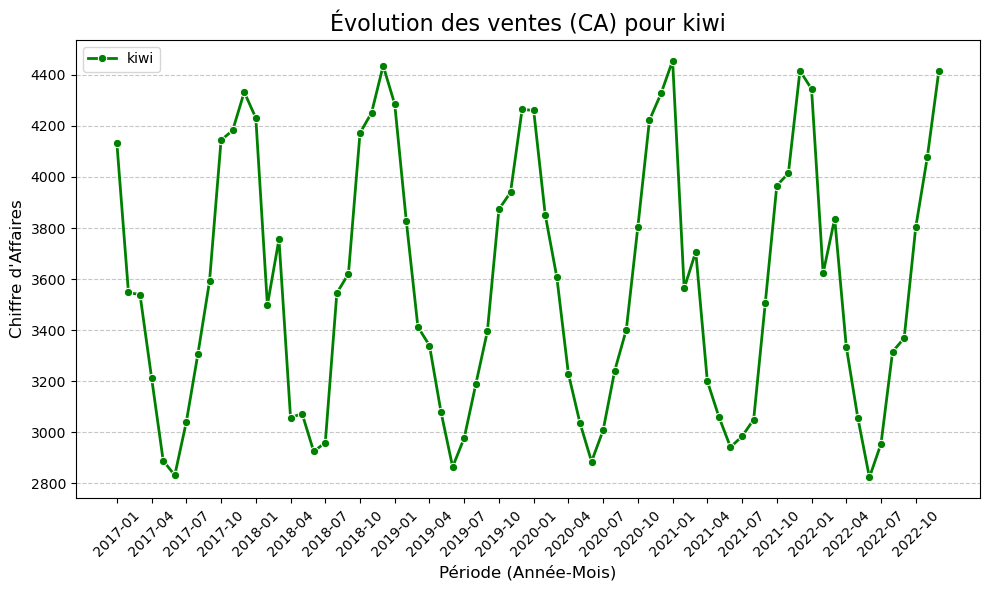

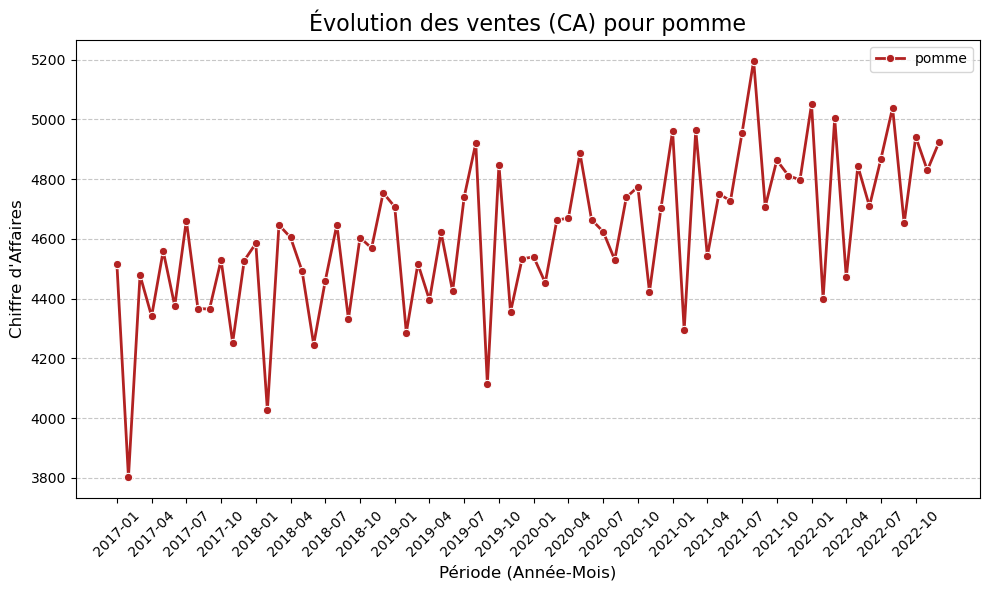

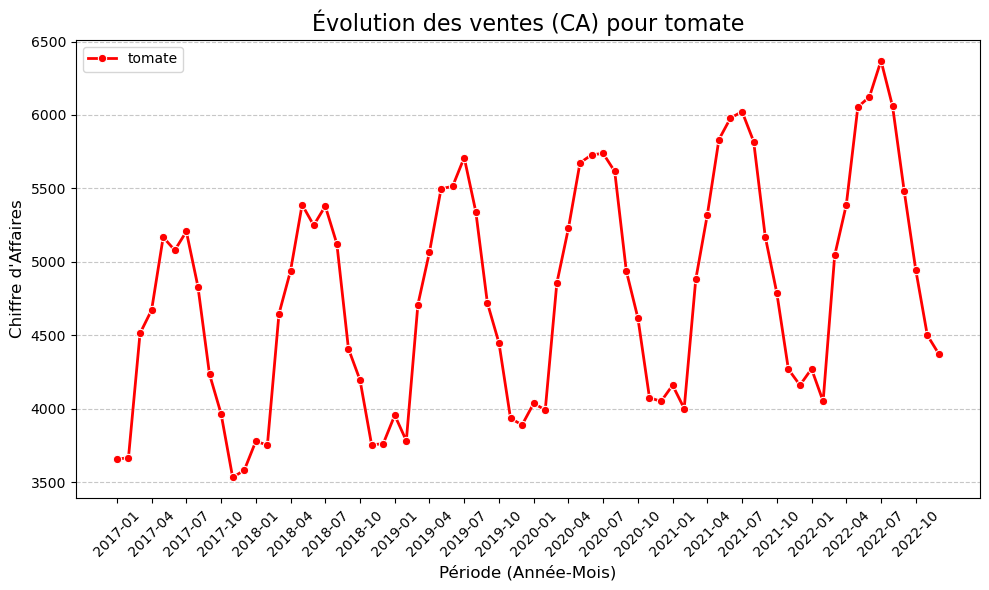

In [44]:

dataset['Année'] = pd.to_datetime(dataset['Date']).dt.year
dataset['Mois'] = pd.to_datetime(dataset['Date']).dt.month

# Grouper le chiffre d'affaires par produit, année et mois
ca_par_produit_mois_annee = dataset.groupby(['Produit', 'Année', 'Mois'])['CA'].sum().reset_index()

# Isoler le TOP 5 des produits en CA total
top_5_produits = ca_par_produit_mois_annee.groupby('Produit')['CA'].sum().nlargest(5).index

# Filtrer les données pour le TOP 5
ca_top_5_mois_annee = ca_par_produit_mois_annee[ca_par_produit_mois_annee['Produit'].isin(top_5_produits)]

# Ajouter une colonne 'Période' pour combiner Année et Mois
ca_top_5_mois_annee['Période'] = ca_top_5_mois_annee['Année'].astype(str) + '-' + ca_top_5_mois_annee['Mois'].astype(str).str.zfill(2)

# Couleurs spécifiques pour chaque produit
couleurs = {
    "abricot": "orange",
    "tomate": "red",
    "banane": "goldenrod",  # Jaune foncé
    "kiwi": "green",
    "pomme": "#B22222"  # Couleur mixte (rouge avec des reflets verts, type pomme gala)
}

# Générer un graphique pour chaque produit
produits = ca_top_5_mois_annee['Produit'].unique()

for produit in produits:
    # Filtrer les données pour le produit courant
    data = ca_top_5_mois_annee[ca_top_5_mois_annee['Produit'] == produit]

    # Couleur spécifique pour le produit
    color = couleurs.get(produit, "blue")  # Couleur par défaut si non définie

    # Créer un graphique pour le produit
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=data,
        x='Période',
        y='CA',
        label=produit,
        linewidth=2,
        marker='o',
        color=color
    )

    # Ajustements des axes et titres
    plt.title(f"Évolution des ventes (CA) pour {produit}", fontsize=16)
    plt.xlabel("Période (Année-Mois)", fontsize=12)
    plt.ylabel("Chiffre d'Affaires", fontsize=12)

    # Espacement et échantillonnage des étiquettes de l'axe X
    plt.xticks(ticks=data['Période'].unique()[::3], rotation=45, fontsize=10)

    # Ajouter une grille
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Afficher le graphique
    plt.tight_layout()
    plt.show()
